# NMR Simulation
## ENPH 453 Advanced Physics Lab Course
### Genevieve Hayes
### Partner: Astral Cai

#### Started: Jan 19, 2021
#### Updated: Feb 08, 2021


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import os

#Figure saving parameter where 0 = do not save figures, 1 = do save figures
SAVEFIG = 0 

In [2]:
# Task 1 function: precession of a magnetic moment in field B0

def precession_of_magnetic_moment(start_vector3D,B0,t):

    # Larmour frequency
    nu = 42.576e6*B0 #(Hz/T)*T, nuclear gyromagnetic ratio
    wL = -2*np.pi*nu

    r = np.sqrt(start_vector3D[0]**2+start_vector3D[1]**2)
    Mx = r*np.cos(wL*t)
    My = r*np.sin(wL*t)
    Mz = start_vector3D[2]
    absM = np.linalg.norm([Mx,My,Mz])
    return Mx, My, Mz, absM, wL


In [3]:
# Task 1 data
start_vector3D = np.array([np.sqrt(3)/2,0,1/2])
B0 =  0.5 #T, static magnetic field which is in the z-direction

tfinal = 2e-7 #s
tinc = 0.002e-7 

time = np.zeros(int(tfinal/tinc))
theta = np.zeros(int(tfinal/tinc))
Mx = np.zeros(int(tfinal/tinc))
My = np.zeros(int(tfinal/tinc))
Mz = np.zeros(int(tfinal/tinc))
absM = np.zeros(int(tfinal/tinc))
i = 0

for i in range(0,int(tfinal/tinc)):
    t = 0 + i*tinc
    Mx[i], My[i], Mz[i], absM[i], wL = precession_of_magnetic_moment(start_vector3D,B0,t)
    time[i] = t
    theta[i] = np.arctan(My[i]/Mx[i]) #1st quadrant
    #check quadrant
    if Mx[i]<0: #2nd and 3rd quadrant
        theta[i] = theta[i] + np.pi
    elif My[i]<0 and Mx[i]>0: #4th quadrant
        theta[i] = theta[i] + 2*np.pi


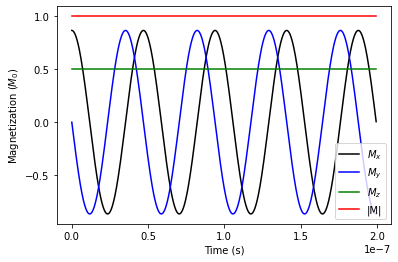

In [4]:
# Task 1 plot magnetizations
plt.plot(time, Mx, 'k', label = "$M_x$") 
plt.plot(time, My, 'b', label = "$M_y$") 
plt.plot(time, Mz, 'g', label = "$M_z$") 
plt.plot(time, absM, 'r', label = "|M|") 

plt.xlabel('Time (s)')
plt.ylabel('Magnetization ($M_0$)')
plt.legend(loc='lower right')
plt.style.use('fullwidthplot.mplstyle')
filename = 'NMRsim_Task1_mag.png'
if SAVEFIG == 1:
    plt.savefig(os.path.join('output', filename), format='png', dpi=300)

plt.show()

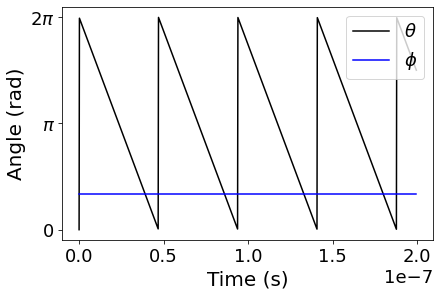

In [5]:
#Task 1 plot angles
phi = np.ones(len(theta))*np.arcsin(start_vector3D[0]/1)

tick_pos= [0, np.pi , 2*np.pi]
labels = ['0', '$\pi$', '$2\pi$']
plt.yticks(tick_pos, labels)

plt.plot(time, theta, 'k', label = r"$\theta$") 
plt.plot(time, phi, 'b', label = r"$\phi$") 

plt.xlabel('Time (s)')
plt.ylabel('Angle (rad)')
plt.legend(loc = "upper right")
plt.style.use('fullwidthplot.mplstyle')
filename = 'NMRsim_Task1_angle.png'
if SAVEFIG == 1:
    plt.savefig(os.path.join('output', filename), format='png', dpi=300)
plt.show()

In [6]:
# Task 2 function: T1 and T2 relaxation of a magnetic moment in field B0 at 90 degrees

def decaying_90_precession_of_magnetic_moment(start_vector3D,B0,t,T1,T2):

    # Larmour frequency
    #g = 1 #correction to the bohr magnetron q/2m 42.58e6 #Hz/T, nuclear gyromagnetic ratio
    #mug = 5.0578e-27 #J/T, nuclear magneton of the nucleus multiplied by the gyromagnetic ratio
    
    nu = 42.576e6*B0 #(Hz/T)*T, nuclear gyromagnetic ratio
    #hbar = 1.054571817e-34 #Js, planck's constant
    #wL = g*mu*B0/hbar
    wL = -2*np.pi*nu
    #wL = g*B0
    
    # gmu B0 = Energy splitting between zeeman sub-levels for the proton
    
    M0 = np.linalg.norm(start_vector3D)
    r = np.sqrt(start_vector3D[0]**2+start_vector3D[1]**2)
    Mx = r*np.cos(wL*t)*np.exp(-t/T2)
    My = r*np.sin(wL*t)*np.exp(-t/T2)
    Mz = M0*(1-np.exp(-t/T1))
    absM = np.linalg.norm([Mx,My,Mz])
    return Mx, My, Mz, absM, wL

In [7]:
# Task 2 data (from -x (90 degree) starting position)

#start_vector3D = np.array([-np.sqrt(3)/2,0,1/2])
start_vector3D = np.array([1,0,0])
B0 =  0.5 #T, static magnetic field which is in the z-direction
T1 = 2e-6 #s, longitudinal relaxation time constant
T2 = 1e-6 #s, longitudinal relaxation time constant

tfinal = 2e-6 #s
tinc = 0.002e-6 

time = np.zeros(int(tfinal/tinc))
theta = np.zeros(int(tfinal/tinc))
Mx = np.zeros(int(tfinal/tinc))
My = np.zeros(int(tfinal/tinc))
Mz = np.zeros(int(tfinal/tinc))
absM = np.zeros(int(tfinal/tinc))
i = 0

for i in range(0,int(tfinal/tinc)):
    t = 0 + i*tinc
    Mx[i], My[i], Mz[i], absM[i], wL = decaying_90_precession_of_magnetic_moment(start_vector3D,B0,t,T1,T2)
    a = np.array([Mx[-1],My[-1],Mz[-1]])
    time[i] = t
    theta[i] = np.arctan(My[i]/Mx[i]) #1st quadrant
    #check quadrant
    if Mx[i]<0: #2nd and 3rd quadrant
        theta[i] = theta[i] + np.pi
    elif My[i]<0 and Mx[i]>0: #4th quadrant
        theta[i] = theta[i] + 2*np.pi

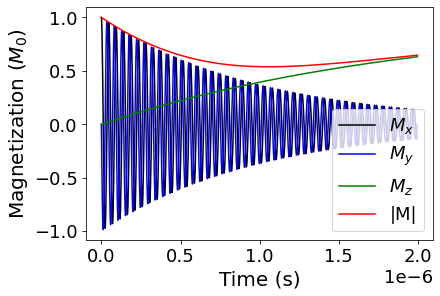

In [8]:
# Task 2 plot magnetization with T1 and T2 effects

plt.plot(time, Mx, 'k', label = "$M_x$") 
plt.plot(time, My, 'b', label = "$M_y$") 
plt.plot(time, Mz, 'g', label = "$M_z$")  
plt.plot(time, absM, 'r', label = "|M|") 

plt.xlabel('Time (s)')
plt.ylabel('Magnetization ($M_0$)')
plt.legend(loc='lower right')
plt.style.use('fullwidthplot.mplstyle')
filename = 'NMRsim_Task2_xstart.png'
if SAVEFIG == 1:
    plt.savefig(os.path.join('output', filename), format='png', dpi=300)
plt.show()

In [9]:
# Task 2 function: T1 and T2 relaxation of a magnetic moment in field B0 at 180 degrees

def decaying_180_precession_of_magnetic_moment(start_vector3D,B0,t,T1,T2):

    # Larmour frequency
    nu = 42.576e6*B0 #(Hz/T)*T, nuclear gyromagnetic ratio
    wL = -2*np.pi*nu

    M0 = np.linalg.norm(start_vector3D)
    r = np.sqrt(start_vector3D[0]**2+start_vector3D[1]**2)
    Mx = r*np.cos(wL*t)*np.exp(-t/T2)
    My = r*np.sin(wL*t)*np.exp(-t/T2)
    Mz = M0*(1-2*np.exp(-t/T1))
    absM = np.linalg.norm([Mx,My,Mz])
    return Mx, My, Mz, absM, wL

In [10]:
# Task 2 data (from -z (180 degree) starting position)

start_vector3D = np.array([0,0,1])
#start_vector3D = np.array([-1,0,0])
B0 =  0.5 #T, static magnetic field which is in the z-direction
T1 = 2e-6 #s, longitudinal relaxation time constant
T2 = 1e-6 #s, longitudinal relaxation time constant

tfinal = 2e-6 #s
tinc = 0.002e-6 

time = np.zeros(int(tfinal/tinc))
theta = np.zeros(int(tfinal/tinc))
Mx = np.zeros(int(tfinal/tinc))
My = np.zeros(int(tfinal/tinc))
Mz = np.zeros(int(tfinal/tinc))
absM = np.zeros(int(tfinal/tinc))
i = 0

for i in range(0,int(tfinal/tinc)):
    t = 0 + i*tinc
    Mx[i], My[i], Mz[i], absM[i], wL = decaying_180_precession_of_magnetic_moment(start_vector3D,B0,t,T1,T2)
    a = np.array([Mx[-1],My[-1],Mz[-1]])
    time[i] = t
    theta[i] = np.arctan(My[i]/Mx[i]) #1st quadrant
    #check quadrant
    if Mx[i]<0: #2nd and 3rd quadrant
        theta[i] = theta[i] + np.pi
    elif My[i]<0 and Mx[i]>0: #4th quadrant
        theta[i] = theta[i] + 2*np.pi


<ipython-input-10-a9e30bc8b2eb>:25: RuntimeWarning: invalid value encountered in double_scalars
  theta[i] = np.arctan(My[i]/Mx[i]) #1st quadrant


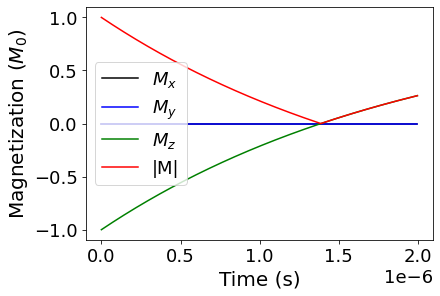

In [11]:
# Task 2 plot magnetization with T1 and T2 effects

plt.plot(time, Mx, 'k', label = "$M_x$") 
plt.plot(time, My, 'b', label = "$M_y$") 
plt.plot(time, Mz, 'g', label = "$M_z$") 
plt.plot(time, absM, 'r', label = "|M|") 

plt.xlabel('Time (s)')
plt.ylabel('Magnetization ($M_0$)')
plt.legend()
plt.style.use('fullwidthplot.mplstyle')
filename = 'NMRsim_Task2_zstart.png'
if SAVEFIG == 1:
    plt.savefig(os.path.join('output', filename), format='png', dpi=300)
plt.show()

In [12]:
# Task 4 function: T1 and T2* relaxation of multiple magnetic moments in field B0 with inhomogeneties at 90 degrees

def many_decaying_90_magnetic_moments(start_vector3D,B0,sigma,t,T1,T2star,N):

    # Inhomogenous magnetic field
    B = np.random.normal(B0, sigma, N)
    
    #Initialize arrays
    Mx = np.zeros(N)
    My = np.zeros(N)
    Mz = np.zeros(N)
    absM = np.zeros(N)
    wL = np.zeros(N)
    
    for i in range(N):
        # Larmour frequency
        nu = 42.576e6*B[i] #(Hz/T)*T, nuclear gyromagnetic ratio
        wL[i] = -2*np.pi*nu
    
        # Calculate magnetizations
        M0 = np.linalg.norm(start_vector3D)
        r = np.sqrt(start_vector3D[0]**2+start_vector3D[1]**2)
        Mx[i] = r*np.cos(wL[i]*t)*np.exp(-t/T2star)
        My[i] = r*np.sin(wL[i]*t)*np.exp(-t/T2)
        Mz[i] = M0*(1-np.exp(-t/T1))
        absM[i] = np.linalg.norm([Mx,My,Mz])
    
    Mx_avg = np.sum(Mx)/N
    My_avg = np.sum(My)/N
    Mz_avg = np.sum(Mz)/N
    absM_avg = np.sum(absM)/N
    wL_avg = np.sum(wL)/N
        
    return Mx_avg, My_avg, Mz_avg, absM_avg, wL_avg

In [13]:
# Task 4 function: T1 and T2* relaxation of multiple magnetic moments in field B0 with inhomogeneties at 180 degrees

def many_decaying_180_magnetic_moments(start_vector3D,B0,sigma,t,T1,T2star,N):

    # Inhomogenous magnetic field
    B = np.random.normal(B0, sigma, N)
    
    #Initialize arrays
    Mx = np.zeros(N)
    My = np.zeros(N)
    Mz = np.zeros(N)
    absM = np.zeros(N)
    wL = np.zeros(N)
    
    for i in range(N):
        # Larmour frequency
        nu = 42.576e6*B[i] #(Hz/T)*T, nuclear gyromagnetic ratio
        wL[i] = -2*np.pi*nu
    
        # Calculate magnetizations
        M0 = np.linalg.norm(start_vector3D)
        r = np.sqrt(start_vector3D[0]**2+start_vector3D[1]**2)
        Mx[i] = r*np.cos(wL[i]*t)*np.exp(-t/T2star)
        My[i] = r*np.sin(wL[i]*t)*np.exp(-t/T2)
        Mz[i] = M0*(1-2*np.exp(-t/T1))
        absM[i] = np.linalg.norm([Mx,My,Mz])
    
    Mx_avg = np.sum(Mx)/N
    My_avg = np.sum(My)/N
    Mz_avg = np.sum(Mz)/N
    absM_avg = np.sum(absM)/N
    wL_avg = np.sum(wL)/N
        
    return Mx_avg, My_avg, Mz_avg, absM_avg, wL_avg

In [19]:
# Task 4 data (from -x (90 degree) starting position)
start_vector3D = np.array([-1,0,0])
B0 = 0.5 #T
sigma = 0.05 #T
T1 = 2e-6
T2star = 1e-6
N = 5000

tfinal = 2e-6 #s
tinc = 0.02e-6 

time = np.zeros(int(tfinal/tinc))
theta = np.zeros(int(tfinal/tinc))
Mx_avg = np.zeros(int(tfinal/tinc))
My_avg = np.zeros(int(tfinal/tinc))
Mz_avg = np.zeros(int(tfinal/tinc))
absM_avg = np.zeros(int(tfinal/tinc))
wL_avg = np.zeros(int(tfinal/tinc))
i = 0

for i in range(0,int(tfinal/tinc)):
    t = 0 + i*tinc
    Mx_avg[i],My_avg[i],Mz_avg[i],absM_avg[i],wL_avg[i] = many_decaying_90_magnetic_moments(start_vector3D,B0,sigma,t,T1,T2star,N)
    time[i] = t
    theta[i] = np.arctan(My_avg[i]/Mx_avg[i]) #1st quadrant
    #check quadrant
    if Mx_avg[i]<0: #2nd and 3rd quadrant
        theta[i] = theta[i] + np.pi
    elif My_avg[i]<0 and Mx_avg[i]>0: #4th quadrant
        theta[i] = theta[i] + 2*np.pi

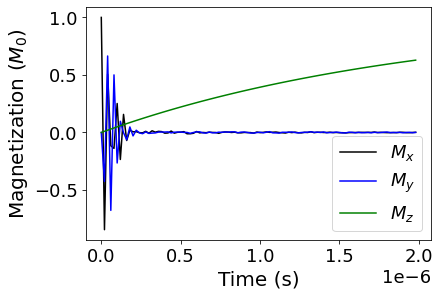

In [20]:
# Task 4 plot magnetization with T1 and T2star effects

plt.plot(time, Mx_avg, 'k', label = "$M_x$") 
plt.plot(time, My_avg, 'b', label = "$M_y$") 
plt.plot(time, Mz_avg, 'g', label = "$M_z$") 
#plt.plot(time, absM_avg, 'r', label = "|M|") 

plt.xlabel('Time (s)')
plt.ylabel('Magnetization ($M_0$)')
plt.legend()
plt.style.use('fullwidthplot.mplstyle')
filename = 'NMRsim_Task4.png'
if SAVEFIG == 1:
    plt.savefig(os.path.join('output', filename), format='png', dpi=300)
plt.show()

In [12]:
def generate_3D_rotation_matrix(theta_degrees):
    theta = np.radians(theta_degrees)
    c, s = np.round(np.cos(theta),3), np.round(np.sin(theta),3)
    R = np.array(((1,0,0),(0, c, -s), (0, s, c)))
    return R

R90 = generate_3D_rotation_matrix(90)

In [23]:
#Task 5: 90 degree pulse at t = tau
start_vector3D = np.array([0,0,1])

B0 = 0.5 #T
sigma = 0.05 #T
T1 = 2e-6
T2star = 1e-6
N = 1000

tfinal = 2e-6 #s
tinc = 0.006e-6 

tau = 0.5e-6

time = np.zeros(int(tfinal/tinc))
theta = np.zeros(int(tfinal/tinc))
Mx_avg = np.zeros(int(tfinal/tinc))
My_avg = np.zeros(int(tfinal/tinc))
Mz_avg = np.zeros(int(tfinal/tinc))
absM_avg = np.zeros(int(tfinal/tinc))
wL_avg = np.zeros(int(tfinal/tinc))
i = 0

for i in range(0,int(tfinal/tinc)):
    t = 0 + i*tinc
    if t<tau:
        Mx_avg[i],My_avg[i],Mz_avg[i],absM_avg[i],wL_avg[i] = many_decaying_180_magnetic_moments(start_vector3D,B0,sigma,t,T1,T2star,N)
        time[i] = t
        theta[i] = np.arctan(My_avg[i]/Mx_avg[i]) #1st quadrant
        new_start_vector3D = [Mx_avg[i],My_avg[i-1],Mz_avg[i]]
        
        #check quadrant
        if Mx_avg[i]<0: #2nd and 3rd quadrant
            theta[i] = theta[i] + np.pi
        elif My_avg[i]<0 and Mx_avg[i]>0: #4th quadrant
            theta[i] = theta[i] + 2*np.pi
    
    else:
        #rotate Mx, My and Mz by 90 degrees when t = tau
        R90 = generate_3D_rotation_matrix(90)
        start_vector3D = np.dot(R90,new_start_vector3D)

        Mx_avg[i],My_avg[i],Mz_avg[i],absM_avg[i],wL_avg[i] = many_decaying_90_magnetic_moments(start_vector3D,B0,sigma,t-tau,T1,T2star,N)
        time[i] = t
    

<ipython-input-23-edd51118e517>:29: RuntimeWarning: invalid value encountered in double_scalars
  theta[i] = np.arctan(My_avg[i]/Mx_avg[i]) #1st quadrant


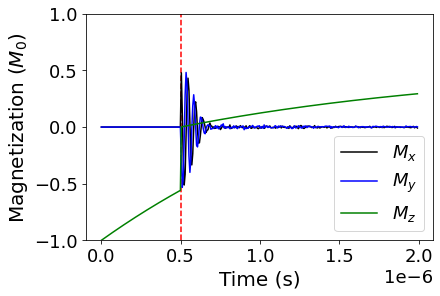

In [32]:
# Task 5 plot magnetization with T1 and T2star effects

plt.axvline(x=0.5e-6, color='r', linestyle='--')
plt.plot(time, Mx_avg, 'k', label = "$M_x$") 
plt.plot(time, My_avg, 'b', label = "$M_y$") 
plt.plot(time, Mz_avg, 'g', label = "$M_z$") 
#plt.plot(time, absM_avg, 'r', label = "|M|") 

plt.xlabel('Time (s)')
plt.ylabel('Magnetization ($M_0$)')
plt.ylim((-1.0,1.0))
plt.legend()
plt.style.use('fullwidthplot.mplstyle')
filename = 'NMRsim_Task5.png'
if SAVEFIG == 1:
    plt.savefig(os.path.join('output', filename), format='png', dpi=300)
plt.show()

In [28]:
#Task 7: 90 degree pulse at t = tau and stable Mz for t<0
start_vector3D = np.array([0,0,1])

B0 = 0.5 #T
sigma = 0.05 #T
T1 = 2e-6
T2star = 1e-6
N = 750

tstart = -2e-7 #s
tfinal = 2e-6 #s
tinc = 0.006e-6 

tau = 0.5e-6

time = np.zeros(int(tfinal/tinc))
theta = np.zeros(int(tfinal/tinc))
Mx_avg = np.zeros(int(tfinal/tinc))
My_avg = np.zeros(int(tfinal/tinc))
Mz_avg = np.zeros(int(tfinal/tinc))
absM_avg = np.zeros(int(tfinal/tinc))
wL_avg = np.zeros(int(tfinal/tinc))
i = 0

for i in range(int(tstart/tinc),int(tfinal/tinc)):
    t = tstart + i*tinc
    if t<0:
        Mx_avg[i],My_avg[i],Mz_avg[i] = start_vector3D
        time[i] = t
    elif 0<t<tau:
        Mx_avg[i],My_avg[i],Mz_avg[i],absM_avg[i],wL_avg[i] = many_decaying_180_magnetic_moments(start_vector3D,B0,sigma,t,T1,T2star,N)
        time[i] = t
        theta[i] = np.arctan(My_avg[i]/Mx_avg[i]) #1st quadrant
        new_start_vector3D = [Mx_avg[i],My_avg[i-1],Mz_avg[i]]
        
        #check quadrant
        if Mx_avg[i]<0: #2nd and 3rd quadrant
            theta[i] = theta[i] + np.pi
        elif My_avg[i]<0 and Mx_avg[i]>0: #4th quadrant
            theta[i] = theta[i] + 2*np.pi
    
    else:
        #rotate Mx, My and Mz by 90 degrees when t = tau
        R90 = generate_3D_rotation_matrix(90)
        start_vector3D = np.dot(R90,new_start_vector3D)
        #start_vector3D = np.array([-1,0,0])
        Mx_avg[i],My_avg[i],Mz_avg[i],absM_avg[i],wL_avg[i] = many_decaying_90_magnetic_moments(start_vector3D,B0,sigma,t-tau,T1,T2star,N)
        time[i] = t

<ipython-input-28-bad80d4bbe1e>:33: RuntimeWarning: invalid value encountered in double_scalars
  theta[i] = np.arctan(My_avg[i]/Mx_avg[i]) #1st quadrant


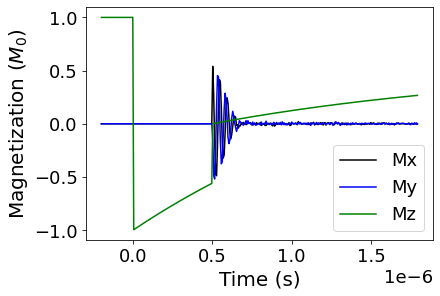

In [30]:
# Task 7 plot magnetization with T1 and T2star effects

plt.plot(time, Mx_avg, 'k', label = "$M_x$") 
plt.plot(time, My_avg, 'b', label = "$M_y$") 
plt.plot(time, Mz_avg, 'g', label = "$M_z$") 
#plt.plot(time, absM_avg, 'r', label = "|M|") 

plt.xlabel('Time (s)')
plt.ylabel('Magnetization ($M_0$)')
plt.legend()
plt.style.use('fullwidthplot.mplstyle')
filename = 'NMRsim_Task7.png'
if SAVEFIG == 1:
    plt.savefig(os.path.join('output', filename), format='png', dpi=300)
plt.show()

In [33]:
# Task 8 function: T1 and T2* relaxation of multiple magnetic moments in field B0 with inhomogeneties at 90 degrees

def avg_many_decaying_magnetic_moments_arrays(start_vector3D,B0,sigma,t,T1,T2star,N):

    # Inhomogenous magnetic field
    B = np.random.normal(B0, sigma, N)
    
    #Initialize arrays
    Mx = np.zeros(N)
    My = np.zeros(N)
    Mz = np.zeros(N)
    absM = np.zeros(N)
    wL = np.zeros(N)
    
    for i in range(N):
        # Larmour frequency
        nu = 42.576e6*B[i] #(Hz/T)*T, nuclear gyromagnetic ratio
        wL[i] = -2*np.pi*nu
    
        # Calculate magnetizations
        M0 = np.linalg.norm(start_vector3D)
        r = np.sqrt(start_vector3D[0]**2+start_vector3D[1]**2)
        Mx[i] = r*np.cos(wL[i]*t)*np.exp(-t/T2star)
        My[i] = r*np.sin(wL[i]*t)*np.exp(-t/T2star)
        Mz[i] = M0 - ((M0-start_vector3D[2])*np.exp(-t/T1))
        absM[i] = np.linalg.norm([Mx,My,Mz])
    
    #Mx_avg = np.sum(Mx)/N
    #My_avg = np.sum(My)/N
    #Mz_avg = np.sum(Mz)/N
    #absM_avg = np.sum(absM)/N
    wL_avg = np.sum(wL)/N
        
    return Mx, My, Mz, absM, wL_avg


def rotate_many_magnetic_moments(Mx,My,Mz,absM,rotationAngle):
    
    R90 = generate_3D_rotation_matrix(rotationAngle)
    
    N = len(Mx)

    rotated_Mx = np.zeros(N)
    rotated_My = np.zeros(N)
    rotated_Mz = np.zeros(N)
    
    for i in range(N):
        vector = np.array([Mx[i],My[i],Mz[i]])
        rotated_vector = np.dot(R90,vector)
        rotated_Mx[i] = rotated_vector[0]
        rotated_My[i] = rotated_vector[1]
        rotated_Mz[i] = rotated_vector[2]
    
    Mx_avg = np.sum(rotated_Mx)/N
    My_avg = np.sum(rotated_My)/N
    Mz_avg = np.sum(rotated_Mz)/N
    
    avg_rotated_vector3D = np.array([Mx_avg,My_avg,Mz_avg])
    
    return avg_rotated_vector3D

In [34]:
# Task 8 function: new more general equation

def avg_magnetizatitons_of_many_decaying_magnetic_moments(start_vector3D,B0,sigma,t,T1,T2star,N):

    # Inhomogenous magnetic field
    B = np.random.normal(B0, sigma, N)
    
    #Initialize arrays
    Mx = np.zeros(N)
    My = np.zeros(N)
    Mz = np.zeros(N)
    absM = np.zeros(N)
    wL = np.zeros(N)
    
    for i in range(N):
        # Larmour frequency
        nu = 42.576e6*B[i] #(Hz/T)*T, nuclear gyromagnetic ratio
        wL[i] = -2*np.pi*nu
    
        # Calculate magnetizations
        M0 = np.linalg.norm(start_vector3D)
        r = np.sqrt(start_vector3D[0]**2+start_vector3D[1]**2)
        Mx[i] = r*np.cos(wL[i]*t)*np.exp(-t/T2star)
        My[i] = r*np.sin(wL[i]*t)*np.exp(-t/T2star)
        Mz[i] = M0 - ((M0-start_vector3D[2])*np.exp(-t/T1))
        absM[i] = np.linalg.norm([Mx,My,Mz])
    
    Mx_avg = np.sum(Mx)/N
    My_avg = np.sum(My)/N
    Mz_avg = np.sum(Mz)/N
    absM_avg = np.sum(absM)/N
    wL_avg = np.sum(wL)/N
        
    return Mx_avg, My_avg, Mz_avg, absM_avg, wL_avg

In [40]:
#Task 8: 90 degree pulse at t = 0 and tau and stable Mz for t<0
start_vector3D = np.array([0,0,1])

B0 = 0.5 #T
sigma = 0.05 #T
T1 = 2e-6
T2star = 1e-6
N = 750

tstart = -2e-7 #s
tfinal = 2e-6 #s
tinc = 0.006e-6 

tau = 1e-6

time = np.zeros(int(tfinal/tinc))
theta = np.zeros(int(tfinal/tinc))
Mx_avg = np.zeros(int(tfinal/tinc))
My_avg = np.zeros(int(tfinal/tinc))
Mz_avg = np.zeros(int(tfinal/tinc))
absM_avg = np.zeros(int(tfinal/tinc))
wL_avg = np.zeros(int(tfinal/tinc))
i = 0

for i in range(int(tstart/tinc),int(tfinal/tinc)):
    t = tstart + i*tinc
    if t<0:
        Mx_avg[i],My_avg[i],Mz_avg[i] = start_vector3D
        time[i] = t
    
    elif 0<=t<tau:
        #rotate Mx, My and Mz by 90 degrees when t = 0
        R90 = generate_3D_rotation_matrix(90)
        t0_start_vector3D = np.dot(R90,start_vector3D)
        Mx_avg[i],My_avg[i],Mz_avg[i],absM_avg[i],wL_avg[i] = avg_magnetizatitons_of_many_decaying_magnetic_moments(t0_start_vector3D,B0,sigma,t,T1,T2star,N)
        time[i] = t
        theta[i] = np.arctan(My_avg[i]/Mx_avg[i]) #1st quadrant
        updated_start_vector3D = [Mx_avg[i],My_avg[i-1],Mz_avg[i]]
        
        #check quadrant
        if Mx_avg[i]<0: #2nd and 3rd quadrant
            theta[i] = theta[i] + np.pi
        elif My_avg[i]<0 and Mx_avg[i]>0: #4th quadrant
            theta[i] = theta[i] + 2*np.pi
    
    else:
        #rotate Mx, My and Mz by 90 degrees when t = tau
        R90 = generate_3D_rotation_matrix(90)
        tau_start_vector3D = np.dot(R90,updated_start_vector3D)
        #start_vector3D = np.array([-1,0,0])
        Mx_avg[i],My_avg[i],Mz_avg[i],absM_avg[i],wL_avg[i] = avg_magnetizatitons_of_many_decaying_magnetic_moments(tau_start_vector3D,B0,sigma,t-tau,T1,T2star,N)

        time[i] = t

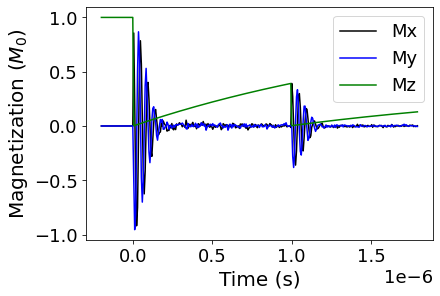

In [41]:
# Task 8 plot magnetization with T1 and T2star effects

plt.plot(time, Mx_avg, 'k', label = "$M_x$") 
plt.plot(time, My_avg, 'b', label = "$M_y$") 
plt.plot(time, Mz_avg, 'g', label = "$M_z$") 
#plt.plot(time, absM_avg, 'r', label = "|M|") 

plt.xlabel('Time (s)')
plt.ylabel('Magnetization ($M_0$)')
plt.legend()
plt.style.use('fullwidthplot.mplstyle')
filename = 'NMRsim_Task8.png'
if SAVEFIG == 1:
    plt.savefig(os.path.join('output', filename), format='png', dpi=300)
plt.show()

In [34]:
# Task 9

from scipy.integrate import odeint

T1 = 2e-6 #s, longitudinal relaxation time constant
T2star = 1e-6 #s, longitudinal relaxation time constant

# define constants
mu = 5.0578e-27  # nuclear magneton
g = 42.58e6  # gyromagnetic ratio
hbar = 1.054571817e-34  # plank's constant
B = [0, 0, 0.5]  # magnetic field

# simulation parameters
dt = 1e-9
t_0 = 0.
t_end = 2e-7
t_arr = np.arange(t_0, t_end, dt)
I0 = [np.sqrt(3)/2, 0, 1/2]

# define ode
def oscillating_field_derivative(I, t):
    global B
    return g * 2 * np.pi *  np.cross(I, B)

N = 500
t_0 = -2e-7
t_end = 2e-6
t_arr = np.arange(t_0, t_end, dt)
tao = 0.5e-6 + 2e-7
I0 = [0, 0, 1]
y = np.zeros((N, len(t_arr), 3))

decay_z = 1 - 2 * np.exp(-t_arr/T1)
decay_xy = np.exp(-t_arr/T2star)
decay = np.array([decay_xy, decay_xy, decay_z]).T
rot = np.array([[1, 0, 0], [0, 0, -1], [0, 1, 0]])
rot_pi = np.array([[1, 0, 0], [0, -1, 0], [0, 0, -1]])

for i in range(N):

    # before first rotation
    y[i,:int(2e-7/dt),:] = I0

    # apply rotation
    I1 = np.dot(rot, I0)

    # set up for iteration
    y0 = y[i,int(2e-7/dt):int(tao/dt)]
    decay0 = decay[int(2e-7/dt):int(tao/dt)]
    t_arr0 = t_arr[int(2e-7/dt):int(tao/dt)]

    # after first rotation
    B0 = np.random.normal(0.5, 0.05)
    B = [0, 0, B0]
    y0[:] = odeint(oscillating_field_derivative, I1, t_arr0)
    y0[:,-1] = np.linalg.norm(I1)
    decay0[:,-1] = 1 - np.exp(-t_arr0/T1)
    y0[:] *= decay0

    # apply rotation
    I2 = np.dot(rot_pi, y0[-1,:])

    # focus on second half
    y0, decay0 = y[i,int(tao/dt):], decay[int(tao/dt):]
    t_arr0 = t_arr[int(tao/dt):] - t_arr[int(tao/dt)]

    # after second rotation
    y0[:] = odeint(oscillating_field_derivative, I2, t_arr0)
    M0 = np.linalg.norm(I2)
    Mi = I2[-1]
    y0[:,-1] = 1
    decay0[:,0] = decay0[:,1] = np.exp(-t_arr0/T2star)
    decay0[:,-1] = M0 - (M0 - Mi) * np.exp(-t_arr0/T1)
    y0[:] *= decay0

# get average
res = np.mean(y, axis=0)


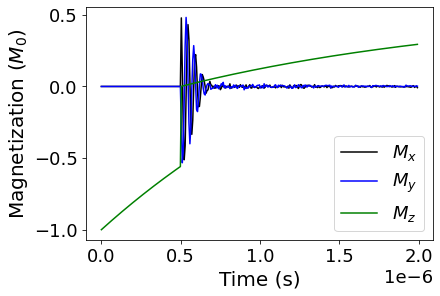

In [35]:
# Task 9 plot magnetization with T1 and T2star effects

plt.plot(time, Mx_avg, 'k', label = "$M_x$") 
plt.plot(time, My_avg, 'b', label = "$M_y$") 
plt.plot(time, Mz_avg, 'g', label = "$M_z$") 

plt.xlabel('Time (s)')
plt.ylabel('Magnetization ($M_0$)')
plt.legend()
plt.style.use('fullwidthplot.mplstyle')
filename = 'NMRsim_Task9.png'
if SAVEFIG == 1:
    plt.savefig(os.path.join('output', filename), format='png', dpi=300)
plt.show()



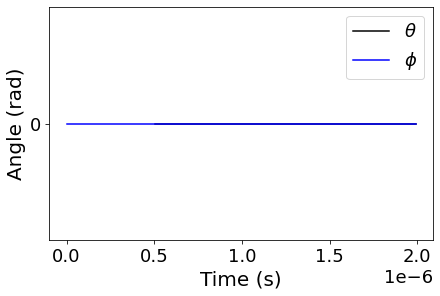

In [36]:
#Task 9 plot angles
phi = np.ones(len(theta))*np.arcsin(start_vector3D[0]/1)

tick_pos= [0, np.pi , 2*np.pi]
labels = ['0', '$\pi$', '$2\pi$']
plt.yticks(tick_pos, labels)

plt.plot(time, theta, 'k', label = r"$\theta$") 
plt.plot(time, phi, 'b', label = r"$\phi$") 

plt.xlabel('Time (s)')
plt.ylabel('Angle (rad)')
plt.legend()
plt.style.use('fullwidthplot.mplstyle')
filename = 'NMRsim_Task9_angle.png'
if SAVEFIG == 0:
    plt.savefig(os.path.join('output', filename), format='png', dpi=300)
plt.show()

In [53]:
# %% Task  10 with pi pulse
from scipy.integrate import odeint

T1 = 2e-6 #s, longitudinal relaxation time constant
T2star = 1e-6 #s, longitudinal relaxation time constant
dt = 1e-8

# %%

# define constants
mu = 5.0578e-27  # nuclear magneton
g = 42.58e6  # gyromagnetic ratio
hbar = 1.054571817e-34  # plank's constant


def spin_magnetic_field_ode(I, t):
    """The ODE that describes the spin in a magnetic field."""
    global B
    return g * 2 * np.pi * np.cross(I, B)

def generate_decay(t_arr, M0, Mi):
    """Generate the decay array"""
    global T1, T2
    decay_xy = np.exp(-t_arr/T2)
    decay_z = M0 - (M0 - Mi) * np.exp(-t_arr/T1)
    return np.array([decay_xy, decay_xy, decay_z]).T

def generate_rot_mat_y(theta):
    return np.array([
        [np.cos(theta), 0, np.sin(theta)],
        [0, 1, 0],
        [-np.sin(theta), 0, np.cos(theta)]
    ])

def generate_rot_mat(theta):
    """Generates the rotation matrix for a rotation around x-axis"""
    return np.array([
        [1, 0, 0],
        [0, np.cos(theta), -np.sin(theta)],
        [0, np.sin(theta), np.cos(theta)]
    ])

# Task 10

# simulation parameters
N = 100
t_0 = -1e-6
t_end = 10e-6
t_arr = np.arange(t_0, t_end, dt)
tao_list = -t_0 + 0.5e-6 + 1e-6 * np.arange(0, 10)
T1 = T2 = 5e-6

# rotation matrix
rot_pi = generate_rot_mat(1 * np.pi)
rot = generate_rot_mat(0.5 * np.pi)
# initial conditions
I0 = [0, 0, 1]

# initialize arrays
y = np.zeros((N, len(t_arr), 3))
t_arr0 = t_arr[int(-t_0/dt):int(tao_list[0]/dt)]

# run simulation
for i in range(N):

    # before first rotation
    y[i, :int(1e-6/dt), :] = I0

    # apply rotation
    I1 = np.dot(rot, I0)

    # set up for iteration
    y0 = y[i, int(1e-6/dt):int(tao_list[0]/dt)]

    # after first rotation till the first pulse
    B = [0, 0, np.random.normal(0.5, 0.05)]
    y0[:] = odeint(spin_magnetic_field_ode, I1, t_arr0)
    M0, Mi = np.linalg.norm(I0), I1[-1]
    y0[:, -1] = 1
    y0[:] *= generate_decay(t_arr0, M0, Mi)

    # apply pulses
    for idx, tao in enumerate(tao_list):

        # apply rotation
        I_i = np.dot(rot_pi, y0[-1, :])

        # update section to look at
        tf = t_arr[int(tao/dt)-1]
        if idx == len(tao_list) - 1:  # from last pulse to end
            y0 = y[i, int(tao/dt):]
            t_arr1 = t_arr[int(tao/dt):] - tf
        else:  # from current pulse to next pulse
            y0 = y[i, int(tao/dt):int(tao_list[idx + 1]/dt)]
            t_arr1 = t_arr[int(tao/dt):int(tao_list[idx + 1]/dt)] - tf

        # after rotation
        y0[:] = odeint(spin_magnetic_field_ode, I_i, t_arr1)
        M0, Mi = np.linalg.norm(I0), I_i[-1]

        y0[:, -1] = 1
        y0[:] *= generate_decay(t_arr1, M0, Mi)

# get average
res = np.mean(y, axis=0)


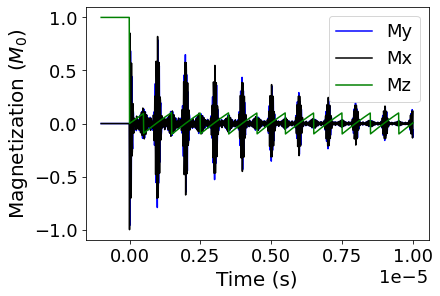

In [54]:
# Task 10 plot Carr-Purcell sequence using pi

plt.plot(time, Mx_avg, 'k', label = "$M_x$") 
plt.plot(time, My_avg, 'b', label = "$M_y$") 
plt.plot(time, Mz_avg, 'g', label = "$M_z$") 

plt.xlabel('Time (s)')
plt.ylabel('Magnetization ($M_0$)')
plt.legend()
plt.style.use('fullwidthplot.mplstyle')
filename = 'NMRsim_Task10_pi.png'
if SAVEFIG == 1:
    plt.savefig(os.path.join('output', filename), format='png', dpi=300)
plt.show()

In [55]:
# %% Task 10 with 1.1pi pulse

# rotation matrix
rot_pi = generate_rot_mat(1.1 * np.pi)

# initialize arrays
y = np.zeros((N, len(t_arr), 3))

# run simulation
for i in range(N):

    # before first rotation
    y[i, :int(1e-6/dt), :] = I0

    # apply rotation
    I1 = np.dot(rot, I0)

    # set up for iteration
    y0 = y[i, int(1e-6/dt):int(tao_list[0]/dt)]

    # after first rotation till the first pulse
    B = [0, 0, np.random.normal(0.5, 0.05)]
    y0[:] = odeint(spin_magnetic_field_ode, I1, t_arr0)
    M0, Mi = np.linalg.norm(I0), I1[-1]
    y0[:, -1] = 1
    y0[:] *= generate_decay(t_arr0, M0, Mi)

    # apply pulses
    for idx, tao in enumerate(tao_list):

        # apply rotation
        I_i = np.dot(rot_pi, y0[-1, :])

        # update section to look at
        tf = t_arr[int(tao/dt)-1]
        if idx == len(tao_list) - 1:  # from last pulse to end
            y0 = y[i, int(tao/dt):]
            t_arr1 = t_arr[int(tao/dt):] - tf
        else:  # from current pulse to next pulse
            y0 = y[i, int(tao/dt):int(tao_list[idx + 1]/dt)]
            t_arr1 = t_arr[int(tao/dt):int(tao_list[idx + 1]/dt)] - tf

        # after rotation
        y0[:] = odeint(spin_magnetic_field_ode, I_i, t_arr1)
        M0, Mi = np.linalg.norm(I0), I_i[-1]

        y0[:, -1] = 1
        y0[:] *= generate_decay(t_arr1, M0, Mi)

# get average
res = np.mean(y, axis=0)

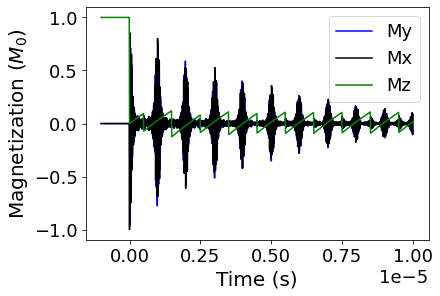

In [56]:
# Task 10 plot Carr-Purcell sequence using 1.1pi

plt.plot(time, Mx_avg, 'k', label = "$M_x$") 
plt.plot(time, My_avg, 'b', label = "$M_y$") 
plt.plot(time, Mz_avg, 'g', label = "$M_z$") 

plt.xlabel('Time (s)')
plt.ylabel('Magnetization ($M_0$)')
plt.legend()
plt.style.use('fullwidthplot.mplstyle')
filename = 'NMRsim_Task10_11pi.png'
if SAVEFIG == 1:
    plt.savefig(os.path.join('output', filename), format='png', dpi=300)
plt.show()

In [57]:
# rotation matrix
rot = generate_rot_mat_y(np.pi / 2)
rot_pi = generate_rot_mat(1.1 * np.pi)

# initialize arrays
y = np.zeros((N, len(t_arr), 3))

# run simulation
for i in range(N):

    # before first rotation
    y[i, :int(1e-6/dt), :] = I0

    # apply rotation
    I1 = np.dot(rot, I0)

    # set up for iteration
    y0 = y[i, int(1e-6/dt):int(tao_list[0]/dt)]

    # after first rotation till the first pulse
    B = [0, 0, np.random.normal(0.5, 0.05)]
    y0[:] = odeint(spin_magnetic_field_ode, I1, t_arr0)
    M0, Mi = np.linalg.norm(I0), I1[-1]
    y0[:, -1] = 1
    y0[:] *= generate_decay(t_arr0, M0, Mi)

    # apply pulses
    for idx, tao in enumerate(tao_list):

        # apply rotation
        I_i = np.dot(rot_pi, y0[-1, :])

        # update section to look at
        tf = t_arr[int(tao/dt)-1]
        if idx == len(tao_list) - 1:  # from last pulse to end
            y0 = y[i, int(tao/dt):]
            t_arr1 = t_arr[int(tao/dt):] - tf
        else:  # from current pulse to next pulse
            y0 = y[i, int(tao/dt):int(tao_list[idx + 1]/dt)]
            t_arr1 = t_arr[int(tao/dt):int(tao_list[idx + 1]/dt)] - tf

        # after rotation
        y0[:] = odeint(spin_magnetic_field_ode, I_i, t_arr1)
        M0, Mi = np.linalg.norm(I0), I_i[-1]

        y0[:, -1] = 1
        y0[:] *= generate_decay(t_arr1, M0, Mi)

# get average
res = np.mean(y, axis=0)

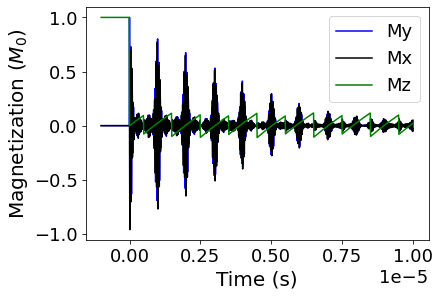

In [58]:
# Task 10 plot Carr-Purcell sequence using 1.1pi with phase shift

plt.plot(time, Mx_avg, 'k', label = "$M_x$") 
plt.plot(time, My_avg, 'b', label = "$M_y$") 
plt.plot(time, Mz_avg, 'g', label = "$M_z$") 

plt.xlabel('Time (s)')
plt.ylabel('Magnetization ($M_0$)')
plt.legend()
plt.style.use('fullwidthplot.mplstyle')
filename = 'NMRsim_Task10_11pi_phaseshift.png'
if SAVEFIG == 1:
    plt.savefig(os.path.join('output', filename), format='png', dpi=300)
plt.show()

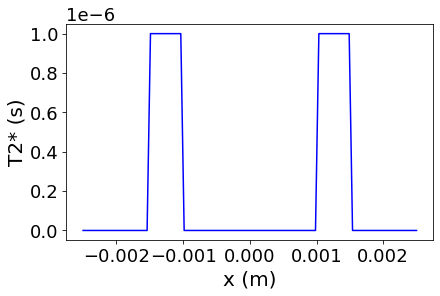

In [7]:
# Task 11 T2star function

# build T2star function
n = int(100)
x = np.linspace(-0.0025,0.0025, n)
T2stargrad = np.concatenate((np.full(int(0.2*n),0),np.full(int(0.1*n),10e-7),np.full(int(0.4*n),0),np.full(int(0.1*n),10e-7),np.full(int(0.2*n),0)))
plt.plot(x,T2stargrad,'b')

plt.xlabel('x (m)')
plt.ylabel('T2* (s)')

plt.style.use('fullwidthplot.mplstyle')
filename = 'NMRsim_Task11_T2star.png'
if SAVEFIG == 1:
    plt.savefig(os.path.join('output', filename), format='png', dpi=300)
plt.show()

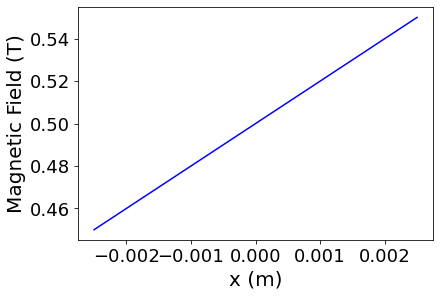

In [8]:
# Task 11 B gradient

# build B gradient
n = int(100)
x = np.linspace(-0.0025,0.0025, n)
B = np.linspace(0.5-20*0.0025,0.5+20*0.0025, n)

plt.plot(x,B,'b')

plt.xlabel('x (m)')
plt.ylabel('Magnetic Field (T)')

plt.style.use('fullwidthplot.mplstyle')
filename = 'NMRsim_Task11_B.png'
if SAVEFIG == 1:
    plt.savefig(os.path.join('output', filename), format='png', dpi=300)
plt.show()

In [9]:
# Task 11 function: new more general equation

def avg_magnetizatitons_of_many_decaying_magnetic_moments_gradB_sparseT2(start_vector3D,B0,t,T1,N):
    
    # build T2star function
    B = np.linspace(B0-20*0.0025,B0+20*0.0025, N)
    
    # build T2star function
    x = np.linspace(-0.0025,0.0025, N)
    T2stargrad = np.concatenate((np.full(int(0.2*N),0),np.full(int(0.1*N),10e-7),np.full(int(0.4*N),0),np.full(int(0.1*N),10e-7),np.full(int(0.2*N),0)))
    
    #Initialize arrays
    Mx = np.zeros(N)
    My = np.zeros(N)
    Mz = np.zeros(N)
    absM = np.zeros(N)
    wL = np.zeros(N)
    
    for i in range(N):
        # Larmour frequency
        nu = 42.576e6*B[i] #(Hz/T)*T, nuclear gyromagnetic ratio
        wL[i] = -2*np.pi*nu
    
        # Calculate magnetizations
        M0 = np.linalg.norm(start_vector3D)
        r = np.sqrt(start_vector3D[0]**2+start_vector3D[1]**2)
        Mx[i] = r*np.cos(wL[i]*t)*np.exp(-t/T2stargrad[i])
        My[i] = r*np.sin(wL[i]*t)*np.exp(-t/T2stargrad[i])
        Mz[i] = M0 - ((M0-start_vector3D[2])*np.exp(-t/T1))
        absM[i] = np.linalg.norm([Mx,My,Mz])
    
    Mx_avg = np.sum(Mx)/N
    My_avg = np.sum(My)/N
    Mz_avg = np.sum(Mz)/N
    absM_avg = np.sum(absM)/N
    wL_avg = np.sum(wL)/N
        
    return Mx_avg, My_avg, Mz_avg, absM_avg, wL_avg

In [13]:
#Task 11 90 degree pulse at t = 0

start_vector3D = np.array([0,0,-1])
new_start_vector3D = start_vector3D

B0 = 0.5 #T
T1 = 2e-6

N = 1100
nn = 1100

tfinal = 1e-5 #s
tinc = tfinal/nn

tau = 0

time = np.zeros(int(tfinal/tinc))
theta = np.zeros(int(tfinal/tinc))

Mx_avg = np.zeros(int(tfinal/tinc))
My_avg = np.zeros(int(tfinal/tinc))
Mz_avg = np.zeros(int(tfinal/tinc))
absM_avg = np.zeros(int(tfinal/tinc))
wL_avg = np.zeros(int(tfinal/tinc))
i = 0

for i in range(0,int(tfinal/tinc)):
    t = 0 + i*tinc
    
    #rotate Mx, My and Mz by 90 degrees when t = tau
    R90 = generate_3D_rotation_matrix(90)
    start_vector3D = np.dot(R90,new_start_vector3D)

    Mx_avg[i],My_avg[i],Mz_avg[i],absM_avg[i],wL_avg[i] = avg_magnetizatitons_of_many_decaying_magnetic_moments_gradB_sparseT2(start_vector3D,B0,t-tau,T1,N)
    time[i] = t
    

<ipython-input-9-f527fcac9610>:27: RuntimeWarning: invalid value encountered in double_scalars
  Mx[i] = r*np.cos(wL[i]*t)*np.exp(-t/T2stargrad[i])
<ipython-input-9-f527fcac9610>:28: RuntimeWarning: invalid value encountered in double_scalars
  My[i] = r*np.sin(wL[i]*t)*np.exp(-t/T2stargrad[i])
<ipython-input-9-f527fcac9610>:27: RuntimeWarning: divide by zero encountered in double_scalars
  Mx[i] = r*np.cos(wL[i]*t)*np.exp(-t/T2stargrad[i])
<ipython-input-9-f527fcac9610>:28: RuntimeWarning: divide by zero encountered in double_scalars
  My[i] = r*np.sin(wL[i]*t)*np.exp(-t/T2stargrad[i])


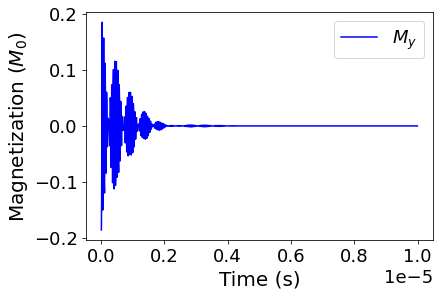

In [14]:
# Task 11 plot magnetization with T2star and B grad effects

#plt.plot(time, Mx_avg, 'k', label = "Mx") 
plt.plot(time, My_avg, 'b', label = "$M_y$") 
#plt.plot(time, Mz_avg, 'g', label = "Mz") 

plt.xlabel('Time (s)')
plt.ylabel('Magnetization ($M_0$)')
plt.legend()
plt.style.use('fullwidthplot.mplstyle')
filename = 'NMRsim_Task11_signal.png'
if SAVEFIG == 1:
    plt.savefig(os.path.join('output', filename), format='png', dpi=300)
plt.show()

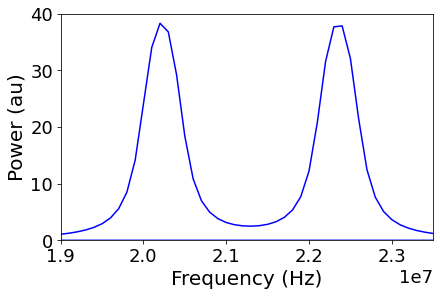

In [15]:
#Task 11 plot FFT
from scipy.fft import fft, ifft, fftfreq

xf = fftfreq(N, tinc)
My_fft = fft(My_avg)

#scaling by 10 to match amplitude units in manual
plt.plot(xf, np.imag(My_fft)*10, 'b', label = "Power") 

plt.ylabel('Power (au)')
plt.xlabel('Frequency (Hz)')
plt.xlim((1.9e7, 2.35e7))
plt.ylim((0, 40))
plt.style.use('fullwidthplot.mplstyle')
filename = 'NMRsim_Task11_fft.png'
if SAVEFIG == 1:
    plt.savefig(os.path.join('output', filename), format='png', dpi=300)
plt.show()


In [67]:
SAVEFIG = 1

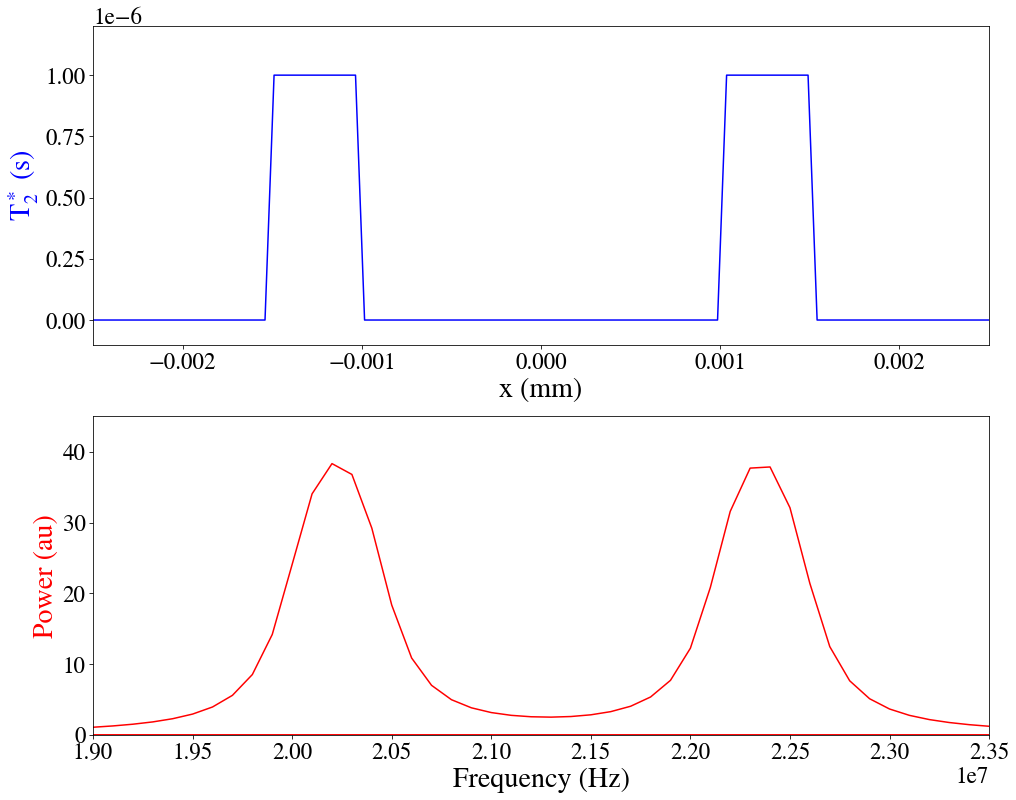

In [73]:
# Task 11 subplot FFT and T2*

plt.rcParams.update({'font.size': 23})
plt.rcParams.update({'mathtext.fontset': 'stix'})
plt.rcParams.update({'font.family': 'STIXGeneral'})
plt.rcParams["figure.figsize"] = (14,11)

fig, (ax1, ax2) = plt.subplots(2)

ax1.plot(x, T2stargrad, color='Blue', label = 'T$_2^*$')
ax1.set_ylabel('T$_2^*$ (s)', color='Blue',fontsize=28)
ax1.tick_params(axis='y')
ax1.set_ylim(-0.1e-6, 1.2e-6)
ax1.set_xlim((-2.5e-3, 2.5e-3))
ax1.set_xlabel('x (mm)',fontsize=28)

ax2.plot(xf, np.imag(My_fft)*10, color='Red', label = 'Power')
ax2.set_ylim(0, 45)
ax2.set_ylabel('Power (au)', color='Red',fontsize=28)
ax2.tick_params(axis='y')
ax2.set_xlim((1.9e7, 2.35e7))
ax2.tick_params(axis='x')
ax2.set_xlabel('Frequency (Hz)',fontsize=28)

filename = 'NMRsim_ExecSum.png'
if SAVEFIG == 1:
    plt.savefig(os.path.join('output', filename), format='png', dpi=300)
plt.show()
